In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

при большом колве столбцов классификация захлебывается

In [73]:
data_2d = pd.read_excel('/content/data_2d_corr.xlsx')
# data_2d = pd.read_csv('/content/data_2d.csv', on_bad_lines='skip')

data_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36015 entries, 0 to 36014
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                36015 non-null  int64  
 1   IC50                      36015 non-null  float64
 2   qed                       36015 non-null  float64
 3   SPS                       36015 non-null  float64
 4   MolWt                     36015 non-null  float64
 5   HeavyAtomMolWt            36015 non-null  float64
 6   ExactMolWt                36015 non-null  float64
 7   NumValenceElectrons       36015 non-null  int64  
 8   BCUT2D_CHGHI              36015 non-null  float64
 9   BCUT2D_CHGLO              36015 non-null  float64
 10  BCUT2D_LOGPHI             36015 non-null  float64
 11  BCUT2D_LOGPLOW            36015 non-null  float64
 12  Chi0                      36015 non-null  float64
 13  Chi0n                     36015 non-null  float64
 14  Chi0v 

In [3]:
data_2d.head()

,Unnamed: 0,IC50,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,BCUT2D_CHGHI,BCUT2D_CHGLO,...,NHOHCount,NOCount,NumAliphaticHeterocycles,NumAliphaticRings,NumHDonors,NumSaturatedRings,MolMR,fr_Al_OH,fr_Al_OH_noTert,SMILES
0,0,0.000015,0.216971,25.916667,362.367,335.151,362.171907,138,2.397472,-2.388319,...,7,9,0,1,6,0,90.4296,0,0,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,1,0.000016,0.651957,25.571429,298.383,272.175,298.189257,120,2.339968,-2.351636,...,4,6,0,1,3,0,79.7279,0,0,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,2,0.000033,0.624022,25.333333,295.359,272.175,295.166331,118,2.336124,-2.369111,...,3,6,0,1,2,0,77.0531,0,0,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,3,0.000032,0.681758,26.250000,283.348,260.164,283.166331,114,2.333876,-2.369058,...,3,6,0,1,2,0,72.5301,0,0,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,4,0.000041,0.561612,10.708333,329.268,318.180,329.064785,122,2.164619,-2.091190,...,4,9,0,0,4,0,81.9775,0,0,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


In [74]:
data_fp = pd.read_excel('/content/data_fp_corr.xlsx')
# data_fp = pd.read_csv('/content/data_fp.csv')
data_fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36021 entries, 0 to 36020
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   36021 non-null  int64  
 1   IC50         36021 non-null  float64
 2   bit_id_78    36021 non-null  int64  
 3   bit_id_123   36021 non-null  int64  
 4   bit_id_222   36021 non-null  int64  
 5   bit_id_227   36021 non-null  int64  
 6   bit_id_245   36021 non-null  int64  
 7   bit_id_260   36021 non-null  int64  
 8   bit_id_418   36021 non-null  int64  
 9   bit_id_482   36021 non-null  int64  
 10  bit_id_519   36021 non-null  int64  
 11  bit_id_528   36021 non-null  int64  
 12  bit_id_598   36021 non-null  int64  
 13  bit_id_602   36021 non-null  int64  
 14  bit_id_605   36021 non-null  int64  
 15  bit_id_679   36021 non-null  int64  
 16  bit_id_750   36021 non-null  int64  
 17  bit_id_764   36021 non-null  int64  
 18  bit_id_880   36021 non-null  int64  
 19  bit_

In [5]:
data_fp.head()

,Unnamed: 0,IC50,bit_id_78,bit_id_123,bit_id_222,bit_id_227,bit_id_245,bit_id_260,bit_id_418,bit_id_482,...,bit_id_1434,bit_id_1474,bit_id_1680,bit_id_1750,bit_id_1803,bit_id_1831,bit_id_1883,bit_id_1921,bit_id_2035,SMILES
0,0,0.000015,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,1,0.000016,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,2,0.000033,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,3,0.000032,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,4,0.000041,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


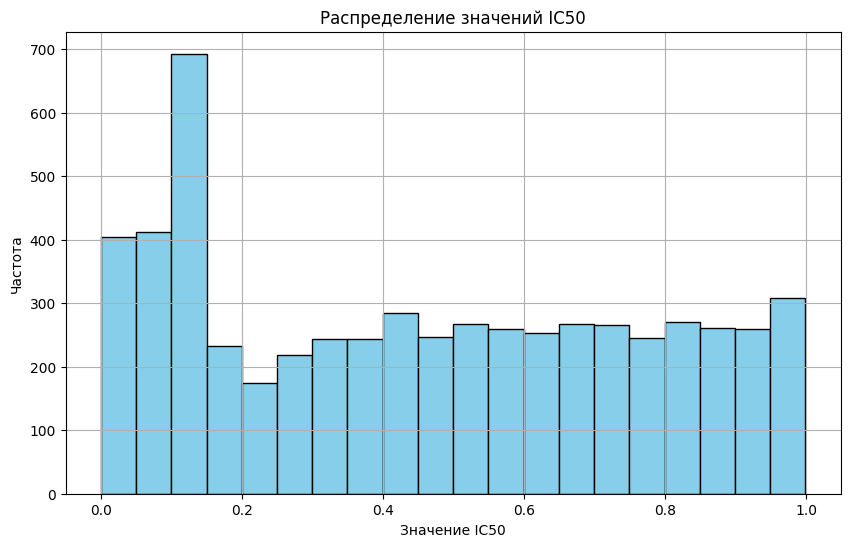

In [ ]:
import matplotlib.pyplot as plt

filtered_data = data_fp[data_fp['IC50'] < 1]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['IC50'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение значений IC50')
plt.xlabel('Значение IC50')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

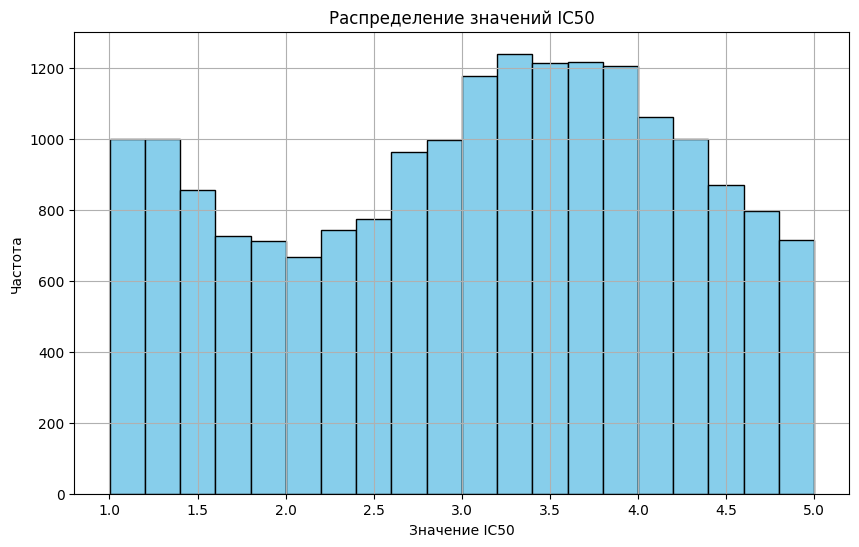

In [ ]:
filtered_data = data_fp[(data_fp['IC50'] > 1) & (data_fp['IC50'] < 5)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['IC50'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение значений IC50')
plt.xlabel('Значение IC50')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

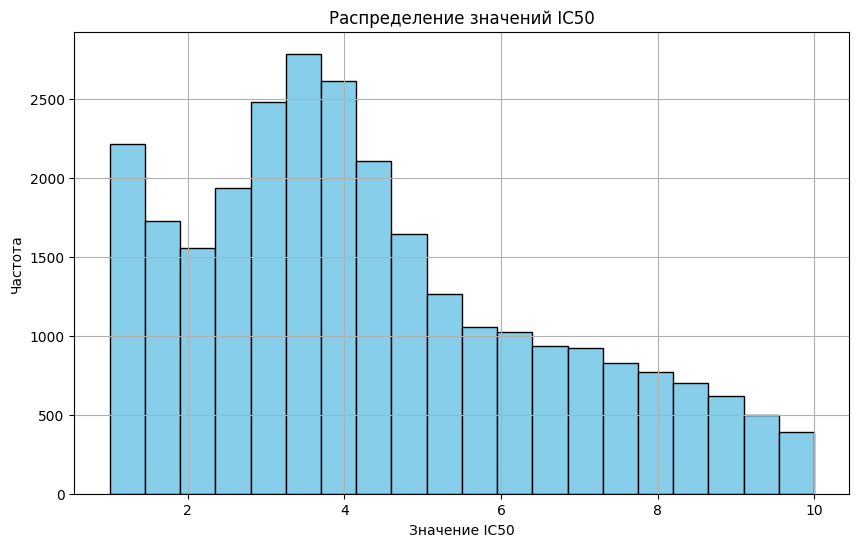

In [ ]:
filtered_data = data_fp[(data_fp['IC50'] > 1) & (data_fp['IC50'] < 10)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['IC50'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение значений IC50')
plt.xlabel('Значение IC50')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

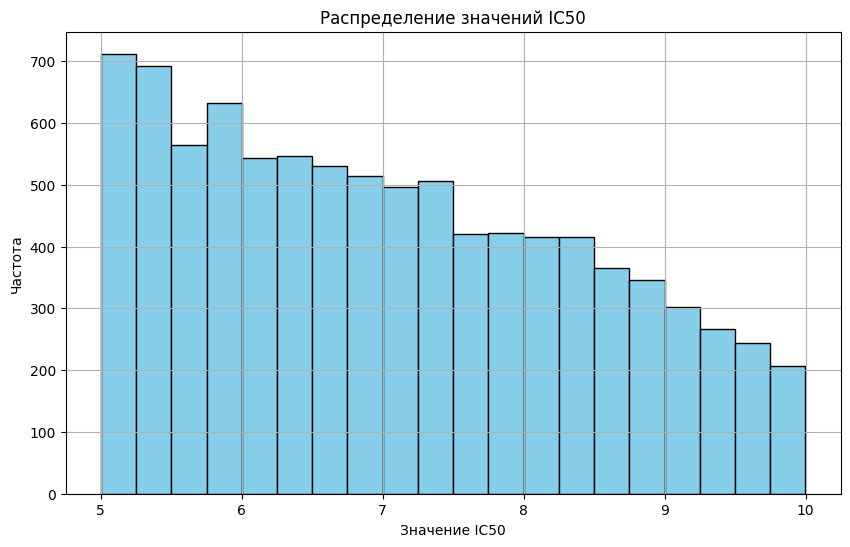

In [ ]:
filtered_data = data_fp[(data_fp['IC50'] > 5) & (data_fp['IC50'] < 10)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['IC50'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение значений IC50')
plt.xlabel('Значение IC50')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

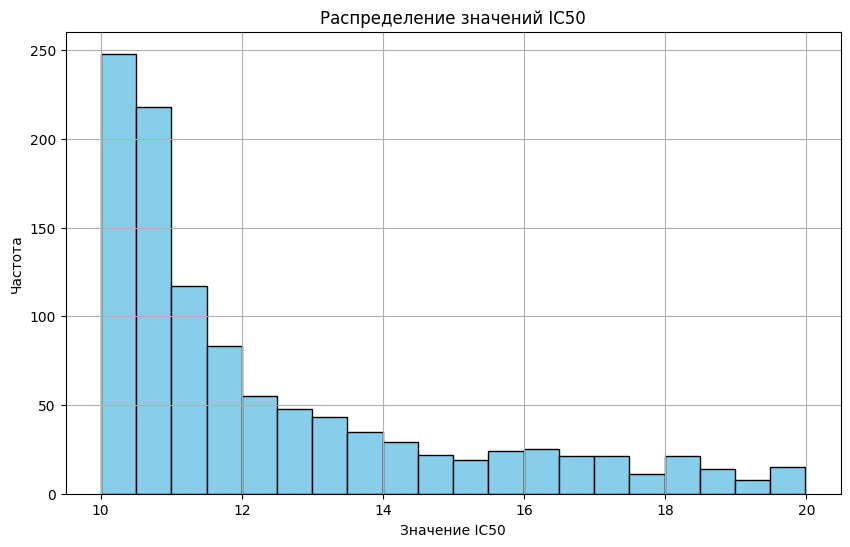

In [ ]:
filtered_data = data_fp[(data_fp['IC50'] > 10) & (data_fp['IC50'] < 20)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['IC50'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение значений IC50')
plt.xlabel('Значение IC50')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

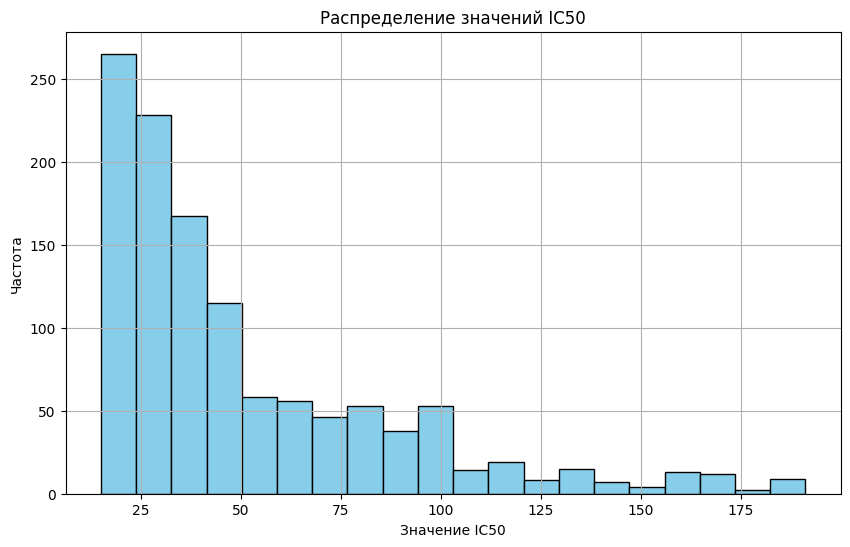

In [ ]:
filtered_data = data_fp[(data_fp['IC50'] > 15)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['IC50'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение значений IC50')
plt.xlabel('Значение IC50')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [139]:
import numpy as np

# Определение диапазонов и количества групп для каждого диапазона
bins_1 = np.linspace(0, 1, 2)          # 5 равных групп от 0 до 1 (6 точек деления)
bins_2 = np.linspace(1, 5, 3)          # 8 равных групп от 1 до 5 (9 точек деления)
bins_3 = np.linspace(5, 11, 2)         # 5 равных групп от 5 до 11 (6 точек деления)
# bins_4 = np.linspace(11, data_fp['IC50'].max(), 3)

bins_4 = np.linspace(11, 50, 2)        # 5 равных групп от 11 до 50 (6 точек деления)
bins_5 = np.linspace(50, 100, 2)       # 5 равных групп от 50 до 100 (6 точек деления)
bins_6 = np.linspace(100, data_fp['IC50'].max(), 2)  # 5 равных групп от 100 до максимального значения (6 точек деления)

def sep_by_groups(data):

    data['IC50_group'] = np.nan

    bins = [bins_1,bins_2,bins_3,bins_4,bins_5,bins_6]
    labels = []
    # Создание меток для групп
    cnt = 0
    for i in range(len(bins)):
        labels.append([str(cnt+j) for j in range(len(bins[i])-1)])
        cnt+=len(bins[i])-1

    # Группировка значений IC50
    data.loc[data['IC50'] <= 1, 'IC50_group'] = pd.cut(data['IC50'], bins=bins_1, labels=labels[0], include_lowest=True)
    data.loc[(data['IC50'] > 1) & (data['IC50'] <= 5), 'IC50_group'] = pd.cut(data['IC50'], bins=bins_2, labels=labels[1], include_lowest=True)
    data.loc[(data['IC50'] > 5) & (data['IC50'] <= 11), 'IC50_group'] = pd.cut(data['IC50'], bins=bins_3, labels=labels[2], include_lowest=True)
    # data.loc[data['IC50'] > 11, 'IC50_group'] = pd.cut(data['IC50'], bins=bins_4, labels=labels[3], include_lowest=True)

    data.loc[(data['IC50'] > 11) & (data['IC50'] <= 50), 'IC50_group'] = pd.cut(data['IC50'], bins=bins_4, labels=labels[3], include_lowest=True)
    data.loc[(data['IC50'] > 50) & (data['IC50'] <= 100), 'IC50_group'] = pd.cut(data['IC50'], bins=bins_5, labels=labels[4], include_lowest=True)
    data.loc[data['IC50'] > 100, 'IC50_group'] = pd.cut(data['IC50'], bins=bins_6, labels=labels[5], include_lowest=True)

    print(data['IC50_group'].sample(n=5))

    return data

In [140]:
mid_points = {
    **{i: (bins_1[i] + bins_1[i+1]) / 2 for i in range(len(bins_1) - 1)},
    **{i + len(bins_1) - 1: (bins_2[i] + bins_2[i+1]) / 2 for i in range(len(bins_2) - 1)},
    **{i + len(bins_1) + len(bins_2) - 2: (bins_3[i] + bins_3[i+1]) / 2 for i in range(len(bins_3) - 1)},
    **{i + len(bins_1) + len(bins_2) + len(bins_3) - 3: (bins_4[i] + bins_4[i+1]) / 2 for i in range(len(bins_4) - 1)},

    **{i + len(bins_1) + len(bins_2) + len(bins_3) + len(bins_4) - 4: (bins_5[i] + bins_5[i+1]) / 2 for i in range(len(bins_5) - 1)},
    **{i + len(bins_1) + len(bins_2) + len(bins_3) + len(bins_4) + len(bins_5) - 5: (bins_6[i] + bins_6[i+1]) / 2 for i in range(len(bins_6) - 1)},
}
mid_points

{0: 0.5, 1: 2.0, 2: 4.0, 3: 8.0, 4: 30.5, 5: 75.0, 6: 145.595}

In [141]:
data_fp = sep_by_groups(data_fp)
data_2d = sep_by_groups(data_2d)

15115    2
11213    1
3354     0
19003    2
4898     0
Name: IC50_group, dtype: object
23025    2
18716    2
32913    3
33703    3
34154    3
Name: IC50_group, dtype: object


для FP

In [11]:
from sklearn.metrics import r2_score

In [152]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X = data_fp.drop(['Unnamed: 0', 'IC50_group', 'SMILES'], axis=1)
y = data_fp['IC50_group']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создание DataFrame с стандартизированными признаками
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 2. Балансировка данных
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)

# Балансировка данных
smote = SMOTE(random_state=2116)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled.drop(['IC50'], axis=1), y_resampled, test_size=0.2, random_state=2116)

In [153]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=1, random_state=2116)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

predicted_ic50_values = [mid_points[int(group)] for group in predictions]
y_test_indexes = y_test.index
true_ic50_values = X_resampled.loc[y_test_indexes, 'IC50']

for true_ic50, predicted_ic50 in zip(true_ic50_values[:5], predicted_ic50_values[:5]):
    print("True IC50:", true_ic50, "| Predicted IC50:", predicted_ic50)

r2 = r2_score(true_ic50_values, predicted_ic50_values)
print("R2:", r2)

Accuracy: 0.3451845797575262
              precision    recall  f1-score   support

           0       0.44      0.12      0.18      2040
           1       0.20      0.47      0.29      2111
           2       0.25      0.06      0.10      2093
           3       0.25      0.47      0.33      2140
           4       0.60      0.18      0.28      2096
           5       0.51      0.44      0.47      2116
           6       0.59      0.67      0.63      2086

    accuracy                           0.35     14682
   macro avg       0.41      0.34      0.32     14682
weighted avg       0.41      0.35      0.33     14682

True IC50: 0.097 | Predicted IC50: 2.0
True IC50: 12.393017291030091 | Predicted IC50: 75.0
True IC50: 4.535 | Predicted IC50: 2.0
True IC50: 1.006 | Predicted IC50: 8.0
True IC50: 3.186 | Predicted IC50: 75.0
R2: 0.07417426781840508


In [151]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=10, min_samples_split=5, min_samples_leaf=1, subsample=0.9, random_state=2116)
# model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=10, min_samples_split=5, min_samples_leaf=1, subsample=0.9, random_state=2116)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

predicted_ic50_values = [mid_points[int(group)] for group in predictions]
y_test_indexes = y_test.index
true_ic50_values = X_resampled.loc[y_test_indexes, 'IC50']

for true_ic50, predicted_ic50 in zip(true_ic50_values[:5], predicted_ic50_values[:5]):
    print("True IC50:", true_ic50, "| Predicted IC50:", predicted_ic50)

r2 = r2_score(true_ic50_values, predicted_ic50_values)
print("R2:", r2)

True IC50: 0.097 | Predicted IC50: 2.0
True IC50: 12.393017291030091 | Predicted IC50: 75.0
True IC50: 4.535 | Predicted IC50: 2.0
True IC50: 1.006 | Predicted IC50: 8.0
True IC50: 3.186 | Predicted IC50: 75.0
R2: 0.11362246135000731


In [154]:
model = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='brute')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

predicted_ic50_values = [mid_points[int(group)] for group in predictions]
y_test_indexes = y_test.index
true_ic50_values = X_resampled.loc[y_test_indexes, 'IC50']

for true_ic50, predicted_ic50 in zip(true_ic50_values[:5], predicted_ic50_values[:5]):
    print("True IC50:", true_ic50, "| Predicted IC50:", predicted_ic50)

r2 = r2_score(true_ic50_values, predicted_ic50_values)
print("R2:", r2)

Accuracy: 0.34225582345729466
              precision    recall  f1-score   support

           0       0.27      0.21      0.24      2040
           1       0.20      0.42      0.27      2111
           2       0.21      0.24      0.22      2093
           3       0.30      0.23      0.26      2140
           4       0.58      0.21      0.31      2096
           5       0.55      0.42      0.48      2116
           6       0.61      0.67      0.64      2086

    accuracy                           0.34     14682
   macro avg       0.39      0.34      0.34     14682
weighted avg       0.39      0.34      0.34     14682

True IC50: 0.097 | Predicted IC50: 2.0
True IC50: 12.393017291030091 | Predicted IC50: 30.5
True IC50: 4.535 | Predicted IC50: 2.0
True IC50: 1.006 | Predicted IC50: 4.0
True IC50: 3.186 | Predicted IC50: 75.0
R2: 0.09528216617408958


In [168]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.1, 0.5, 1.0]
}

model = SVC(C=10, kernel='rbf', gamma=0.01, degree=5, coef0=0.5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

predicted_ic50_values = [mid_points[int(group)] for group in predictions]
y_test_indexes = y_test.index
true_ic50_values = X_resampled.loc[y_test_indexes, 'IC50']

r2 = r2_score(true_ic50_values, predicted_ic50_values)
print("R2:", r2)

Accuracy: 0.2747582073287018
              precision    recall  f1-score   support

           0       0.25      0.06      0.10      2040
           1       0.20      0.51      0.29      2111
           2       0.13      0.03      0.05      2093
           3       0.24      0.40      0.30      2140
           4       0.30      0.13      0.19      2096
           5       0.37      0.22      0.27      2116
           6       0.45      0.56      0.50      2086

    accuracy                           0.27     14682
   macro avg       0.28      0.27      0.24     14682
weighted avg       0.28      0.27      0.24     14682

R2: -0.23967451563720155


для 2D

In [169]:
X = data_2d.drop(['Unnamed: 0', 'IC50_group', 'SMILES'], axis=1)
y = data_2d['IC50_group']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создание DataFrame с стандартизированными признаками
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 2. Балансировка данных
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)

# Балансировка данных
smote = SMOTE(random_state=2116)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled.drop(['IC50'], axis=1), y_resampled, test_size=0.2, random_state=2116)

In [172]:
X_train.columns

Index(['qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI',
       'BCUT2D_LOGPLOW', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v',
       'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'Kappa1',
       'LabuteASA', 'PEOE_VSA1', 'SMR_VSA1', 'SMR_VSA4', 'SMR_VSA5',
       'SlogP_VSA2', 'SlogP_VSA5', 'TPSA', 'EState_VSA1', 'EState_VSA10',
       'VSA_EState3', 'FractionCSP3', 'HeavyAtomCount', 'NHOHCount', 'NOCount',
       'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumHDonors',
       'NumSaturatedRings', 'MolMR', 'fr_Al_OH', 'fr_Al_OH_noTert'],
      dtype='object')

In [180]:
model = RandomForestClassifier(n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=2116)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

predicted_ic50_values = [mid_points[int(group)] for group in predictions]
y_test_indexes = y_test.index
true_ic50_values = X_resampled.loc[y_test_indexes, 'IC50']

for true_ic50, predicted_ic50 in zip(true_ic50_values[:5], predicted_ic50_values[:5]):
    print("True IC50:", true_ic50, "| Predicted IC50:", predicted_ic50)

r2 = r2_score(true_ic50_values, predicted_ic50_values)
print("R2:", r2)

Accuracy: 0.7019479634927122
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      2038
           1       0.53      0.47      0.50      2113
           2       0.41      0.40      0.41      2094
           3       0.47      0.49      0.48      2137
           4       0.89      0.94      0.92      2098
           5       0.96      0.99      0.97      2117
           6       0.98      1.00      0.99      2085

    accuracy                           0.70     14682
   macro avg       0.70      0.70      0.70     14682
weighted avg       0.70      0.70      0.70     14682

True IC50: 0.8407214131269177 | Predicted IC50: 0.5
True IC50: 11.828107565225876 | Predicted IC50: 30.5
True IC50: 4.536 | Predicted IC50: 8.0
True IC50: 1.007 | Predicted IC50: 4.0
True IC50: 3.187 | Predicted IC50: 2.0
R2: 0.9109420573048943


In [190]:
model = GradientBoostingClassifier(n_estimators=5, learning_rate=0.9, max_depth=30, min_samples_split=2, min_samples_leaf=1, subsample=0.9, random_state=2116)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

predicted_ic50_values = [mid_points[int(group)] for group in predictions]
y_test_indexes = y_test.index
true_ic50_values = X_resampled.loc[y_test_indexes, 'IC50']

for true_ic50, predicted_ic50 in zip(true_ic50_values[:5], predicted_ic50_values[:5]):
    print("True IC50:", true_ic50, "| Predicted IC50:", predicted_ic50)

r2 = r2_score(true_ic50_values, predicted_ic50_values)
print("R2:", r2)

Accuracy: 0.622735322163193
              precision    recall  f1-score   support

           0       0.47      0.50      0.48      2038
           1       0.38      0.38      0.38      2113
           2       0.36      0.34      0.35      2094
           3       0.39      0.38      0.38      2137
           4       0.83      0.82      0.82      2098
           5       0.95      0.96      0.95      2117
           6       0.97      0.99      0.98      2085

    accuracy                           0.62     14682
   macro avg       0.62      0.62      0.62     14682
weighted avg       0.62      0.62      0.62     14682

True IC50: 0.8407214131269177 | Predicted IC50: 2.0
True IC50: 11.828107565225876 | Predicted IC50: 30.5
True IC50: 4.536 | Predicted IC50: 4.0
True IC50: 1.007 | Predicted IC50: 8.0
True IC50: 3.187 | Predicted IC50: 2.0
R2: 0.8800963426624606


In [184]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

predicted_ic50_values = [mid_points[int(group)] for group in predictions]
y_test_indexes = y_test.index
true_ic50_values = X_resampled.loc[y_test_indexes, 'IC50']

for true_ic50, predicted_ic50 in zip(true_ic50_values[:5], predicted_ic50_values[:5]):
    print("True IC50:", true_ic50, "| Predicted IC50:", predicted_ic50)

r2 = r2_score(true_ic50_values, predicted_ic50_values)
print("R2:", r2)

Accuracy: 0.64997956681651
              precision    recall  f1-score   support

           0       0.47      0.67      0.55      2038
           1       0.46      0.41      0.43      2113
           2       0.39      0.26      0.31      2094
           3       0.50      0.31      0.38      2137
           4       0.76      0.94      0.84      2098
           5       0.89      0.98      0.93      2117
           6       0.92      0.99      0.95      2085

    accuracy                           0.65     14682
   macro avg       0.63      0.65      0.63     14682
weighted avg       0.63      0.65      0.63     14682

True IC50: 0.8407214131269177 | Predicted IC50: 0.5
True IC50: 11.828107565225876 | Predicted IC50: 30.5
True IC50: 4.536 | Predicted IC50: 8.0
True IC50: 1.007 | Predicted IC50: 0.5
True IC50: 3.187 | Predicted IC50: 145.595
R2: 0.8073974803532568
